# [$\alpha$/Fe] bimodality - correcting for APOGEE z-height selection

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/scripts')
from apogee_tools import import_apogee, apogee_region, apogee_mdf
from multizone_stars import MultizoneStars
from utils import get_bin_centers, sample_dataframe

In [2]:
GALR_LIM = (7, 9)
ABSZ_LIM = (0, 2)

In [3]:
apogee_data = apogee_region(import_apogee(), galr_lim=GALR_LIM, absz_lim=ABSZ_LIM)

In [22]:
vice_stars = MultizoneStars.from_output('gaussian/insideout/exponential_timescale15/diskmodel').region(galr_lim=GALR_LIM, absz_lim=ABSZ_LIM)

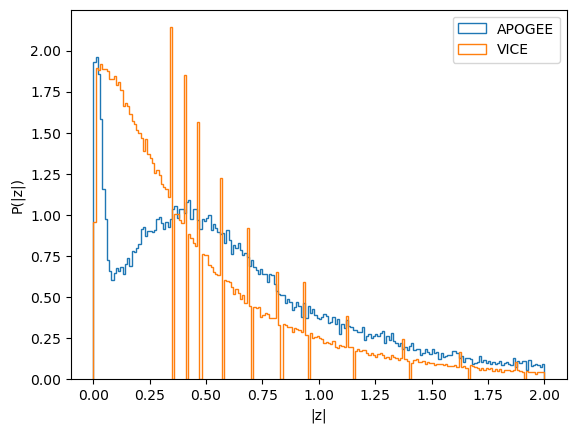

In [31]:
plt.hist(apogee_data['GALZ'].abs(), bins=np.arange(0, 2.01, 0.01), histtype='step', density=True, label='APOGEE')
plt.hist(vice_stars('zfinal').abs(), bins=np.arange(0, 2.01, 0.01), histtype='step', density=True, label='VICE')
plt.xlabel('|z|')
plt.ylabel('P(|z|)')
plt.legend()
plt.show()

In [6]:
apogee_subset = apogee_region(apogee_data, absz_lim=(0.5, 1))
vice_subset = vice_stars.region(absz_lim=(0.5, 1))

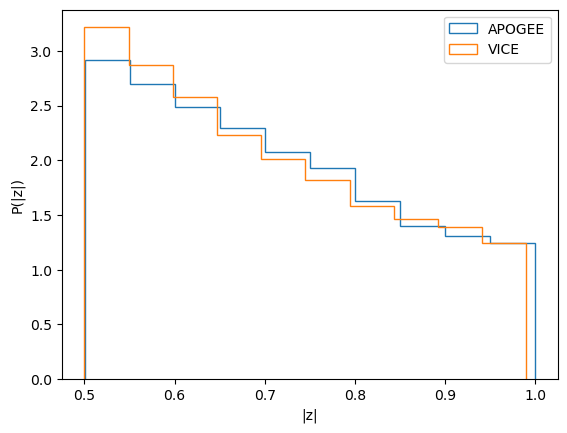

In [7]:
plt.hist(apogee_subset['GALZ'].abs(), bins=10, histtype='step', density=True, label='APOGEE')
plt.hist(vice_subset('zfinal').abs(), bins=10, histtype='step', density=True, label='VICE')
plt.xlabel('|z|')
plt.ylabel('P(|z|)')
plt.legend()
plt.show()

/tmp/ipykernel_5468/3389113080.py:6: RuntimeWarning: invalid value encountered in divide
  absz_weights = apogee_dist / vice_dist


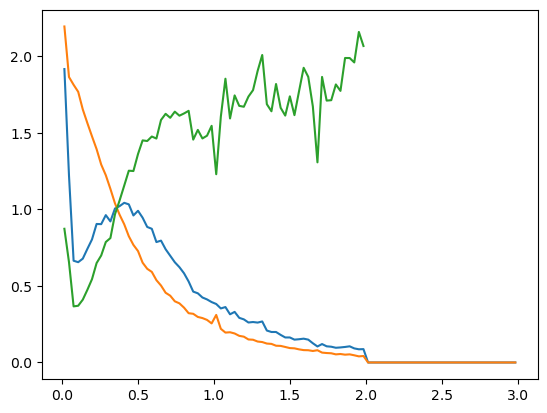

In [55]:
# re-sample VICE with APOGEE vertical distribution
bin_edges = np.linspace(0., 3., 100)
bin_centers = get_bin_centers(bin_edges)
apogee_dist, _ = np.histogram(apogee_data['GALZ'].abs(), bins=bin_edges, density=True)
vice_dist, _ = np.histogram(vice_stars('zfinal').abs(), bins=bin_edges, density=True)
absz_weights = apogee_dist / vice_dist
plt.plot(bin_centers, apogee_dist)
plt.plot(bin_centers, vice_dist)
plt.plot(bin_centers, absz_weights)
plt.show()

In [58]:
bin_cuts = pd.cut(vice_stars('zfinal').abs(), bins=bin_edges, labels=False, include_lowest=True)
absz_weights[bin_cuts]

array([1.30722483, 1.46269905, 1.73673434, ..., 0.87324677, 1.45068835,
       0.81259524])

In [59]:
mass_weights = vice_stars.stars['mstar'] / vice_stars.stars['mstar'].sum()
sample_weights = absz_weights[bin_cuts]
sample_weights /= sample_weights.sum()
sample = sample_dataframe(vice_stars.stars.copy(), 10000, weights=sample_weights)

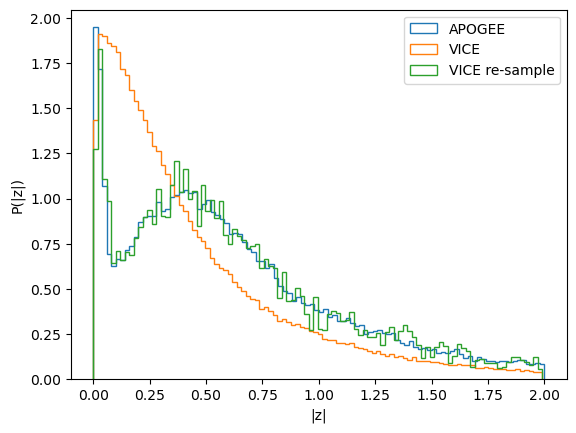

In [60]:
plt.hist(apogee_data['GALZ'].abs(), bins=100, histtype='step', density=True, label='APOGEE')
plt.hist(vice_stars('zfinal').abs(), bins=100, histtype='step', density=True, label='VICE')
plt.hist(sample['zfinal'].abs(), bins=100, histtype='step', density=True, label='VICE re-sample')
plt.xlabel('|z|')
plt.ylabel('P(|z|)')
plt.legend()
plt.show()